In [1]:
# 1. SET GLOBAL PATH 
import sys
path2oti = '../../../build'
sys.path.append(path2oti) # Add path to OTI library.

import pyoti.dense as oti
eps = oti.e

from pyoti.core import imdir

import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

from ode_solve import *

In [2]:
from scipy.special import comb

In [3]:
order = 25
var = 5
comb(order+var,order, exact = True)

142506

In [4]:
# Define functions



def F_eval( t, X ):
    x = X[0]
    y = X[1]
    return [1 -  (x**2-y**2) / (x**2+y**2)**2,  -2*x*y/(x**2+y**2)**2]


# def F_eval( t, X ):
#     x = X[0]
#     y = X[1]
#     return [y, x**3-x]

def F_eval( t, X ):
    x = X[0]
    y = X[1]
    return [y, -x**2]

In [5]:
# Define initial value (starting point of the streamline).

x0 = [ -1.0, 2.0]

x0 = [ 0, -2.0]

t0 = 0.0

In [6]:
F_eval(0,x0)

[-2.0, 0]

In [7]:
# %timeit F_eval(t0,x0)

In [8]:
order = 10
epsilon = 1e-4
x, dt_est = ode_step(F_eval, x0, t0, eps = epsilon , order = order )

print("\nx0 :",x[0])
print("\nx1 :",x[1])

print("dt estimate: ",dt_est)

xf = np.array(X(dt_est,x))


x0 : 0 - 2 * e([1]) - 0 * e([[1,2]]) - 0 * e([[1,3]]) - 0.333333 * e([[1,4]]) - 0 * e([[1,5]]) - 0 * e([[1,6]]) - 0.031746 * e([[1,7]]) - 0 * e([[1,8]]) - 0 * e([[1,9]]) - 0.0026455 * e([[1,10]])

x1 : -2 - 0 * e([1]) - 0 * e([[1,2]]) - 1.33333 * e([[1,3]]) - 0 * e([[1,4]]) - 0 * e([[1,5]]) - 0.222222 * e([[1,6]]) - 0 * e([[1,7]]) - 0 * e([[1,8]]) - 0.026455 * e([[1,9]]) - 0 * e([[1,10]])
dt estimate:  inf


/home/maristi7/coding/otilib/tests/jupyter_notebook/ode/ode_solve.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  dt = np.power(eps/norm_np1,1.0/(order+1.0))
/home/maristi7/coding/otilib/tests/jupyter_notebook/ode/ode_solve.py:306: RuntimeWarning: invalid value encountered in double_scalars
  X_val[k] += X[k][[0,i]]*t**i


In [94]:
# %timeit F_eval(t0,x)

In [77]:
xf

array([-1.82257182,  0.8237804 ])

In [79]:
tf =2.0
order = 10 
epsilon = 1e-4
sols = []

for i in range(1,order + 1):
    sols.append( ode_integrate( F_eval, x0, t0, tf, eps=epsilon, order = i) )
# end for 


In [80]:
solArray = np.array(sols[9],dtype = object)


In [81]:
def stats_ode_sol(ode_sols):

    for sol in ode_sols:
        
        solArr = np.array(sol, dtype= object)
        
        ti = solArr[:-1,2]
        tf = solArr[1:,2]
        dt = tf-ti
        sol_order = sol[1][1][0].order
        print("")
        print("Evaluated order : ", sol_order)
        print("Number of integration steps:", len(sol)-1)
        print("Number of calls to F:", (len(sol)-1)*sol_order)
        
        print("Max dt: ",np.max(dt))
        print("Min dt: ",np.min(dt))
        

    # end for 
# end 
        
        

In [82]:
stats_ode_sol(sols)


Evaluated order :  1
Number of integration steps: 201
Number of calls to F: 201
Max dt:  0.01
Min dt:  0.00995037312743463

Evaluated order :  2
Number of integration steps: 30
Number of calls to F: 60
Max dt:  0.06694329500821697
Min dt:  0.06694167059890277

Evaluated order :  3
Number of integration steps: 11
Number of calls to F: 33
Max dt:  0.18614397594434529
Min dt:  0.18612097182041992

Evaluated order :  4
Number of integration steps: 6
Number of calls to F: 24
Max dt:  0.3594484785455092
Min dt:  0.3594431818738023

Evaluated order :  5
Number of integration steps: 4
Number of calls to F: 20
Max dt:  0.5746239856544997
Min dt:  0.5746113609033539

Evaluated order :  6
Number of integration steps: 3
Number of calls to F: 18
Max dt:  0.821269683581921
Min dt:  0.8212619898681068

Evaluated order :  7
Number of integration steps: 2
Number of calls to F: 14
Max dt:  1.0915982732949916
Min dt:  1.0915944425956876

Evaluated order :  8
Number of integration steps: 2
Number of call

In [83]:
dt = 1e-2
x_vals_oti = []
for i in range(1,order + 1):
    
    x_vals_oti.append( get_interpolate(sols[i-1], dt, tf) )
    
# end for 

A = np.zeros((10,3))
A[:,0] = np.arange(0,10,1)

<IPython.core.display.Javascript object>


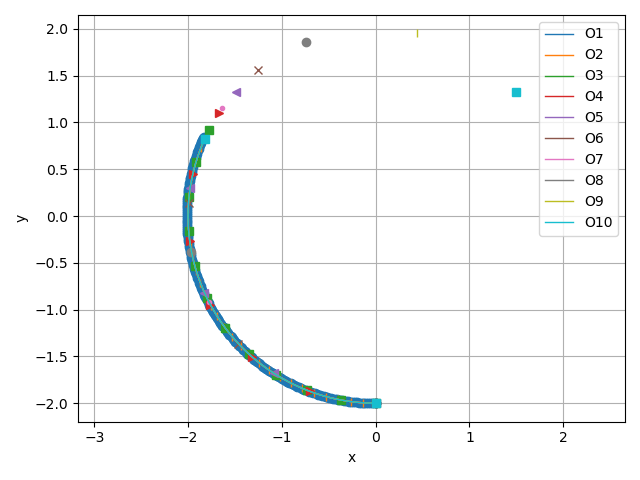

In [84]:
plt.figure()

plt.plot(x0[0],x0[1],'ko')
symbols = [".","o","|","s",">","<","x"]
for i in range(1,order +1,1):
# for i in range(1,4):
    sol = sols[i-1]
    x_vals = x_vals_oti[i-1]
    color = 'C%d'%(int(i-1))
#     print(color)
    plt.plot(x_vals[:,0],x_vals[:,1],color,linewidth=1.0, label="O%d"%(i))
    for j in range(len(sol)):
        plt.plot(sol[j][0][0],sol[j][0][1],color+symbols[i%len(symbols)])
    # end for 
# end for
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid('on')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [85]:
dt_euler = 1e-6
x_vals_euler = euler_integration(F_eval, x0, dt_euler, tf)
slicer = int(np.ceil(dt / dt_euler))
x_vals_euler = x_vals_euler[::slicer]
x_vals_euler

array([[ 0.00000000e+00, -2.00000000e+00,  0.00000000e+00],
       [-1.99996668e-02, -1.99990001e+00,  1.00000000e-02],
       [-3.99973338e-02, -1.99960003e+00,  2.00000000e-02],
       [-5.99910013e-02, -1.99910010e+00,  3.00000000e-02],
       [-7.99786700e-02, -1.99840025e+00,  4.00000000e-02],
       [-9.99583410e-02, -1.99750057e+00,  5.00000000e-02],
       [-1.19928017e-01, -1.99640114e+00,  6.00000000e-02],
       [-1.39885700e-01, -1.99510207e+00,  7.00000000e-02],
       [-1.59829394e-01, -1.99360349e+00,  8.00000000e-02],
       [-1.79757106e-01, -1.99190556e+00,  9.00000000e-02],
       [-1.99666843e-01, -1.99000843e+00,  1.00000000e-01],
       [-2.19556614e-01, -1.98791231e+00,  1.10000000e-01],
       [-2.39424429e-01, -1.98561739e+00,  1.20000000e-01],
       [-2.59268302e-01, -1.98312392e+00,  1.30000000e-01],
       [-2.79086249e-01, -1.98043213e+00,  1.40000000e-01],
       [-2.98876287e-01, -1.97754230e+00,  1.50000000e-01],
       [-3.18636439e-01, -1.97445472e+00

<IPython.core.display.Javascript object>


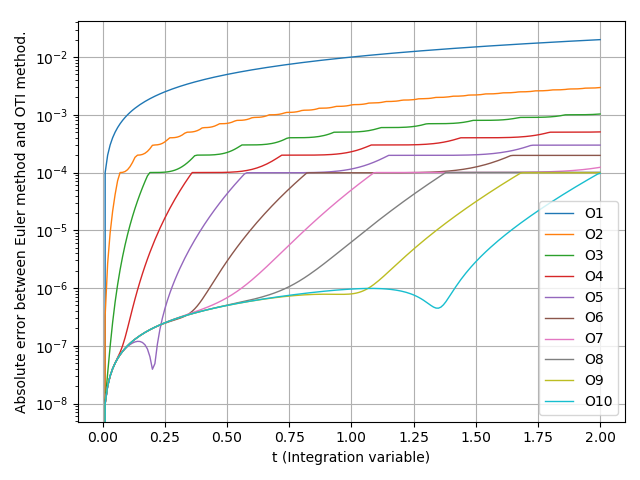

In [86]:
# Plot error values
plt.figure()

symbols = [".","o","|","s",">","<","x"]
for i in range(1,order +1,1):

    sol = sols[i-1]
    x_vals = x_vals_oti[i-1]
    # Subtract to euler integration to obtain the error measures.
    err = np.linalg.norm(x_vals[:,:2] - x_vals_euler[:,:2],axis=1)

    color = 'C%d'%(int(i-1))

    plt.semilogy(x_vals[:,2],err,color,linewidth=1.0, label="O%d"%(i))

# end for

plt.xlabel("t (Integration variable)")
plt.ylabel("Absolute error between Euler method and OTI method.")
plt.legend()
plt.grid('on')
plt.tight_layout()
plt.show()


In [20]:
dt = 1e-5
x_vals_oti = []

for i in range(1,order+1):
    
    x_vals_oti.append( get_x(dt, dt_est, x, order = i ) )

# end for 


In [54]:
print("Error between Euler method with dt = ",dt," and OTI ODE solution.")
print("eps requested: ", epsilon)
print("eps obtained:  ", np.linalg.norm(xf-x_vals_euler[-1]))
np.linalg.norm(xf-x_vals_euler[-1])

Error between Euler method with dt =  1e-05  and OTI ODE solution.
eps requested:  0.0001
eps obtained:   0.00010221031273765867


0.00010221031273765867

<IPython.core.display.Javascript object>


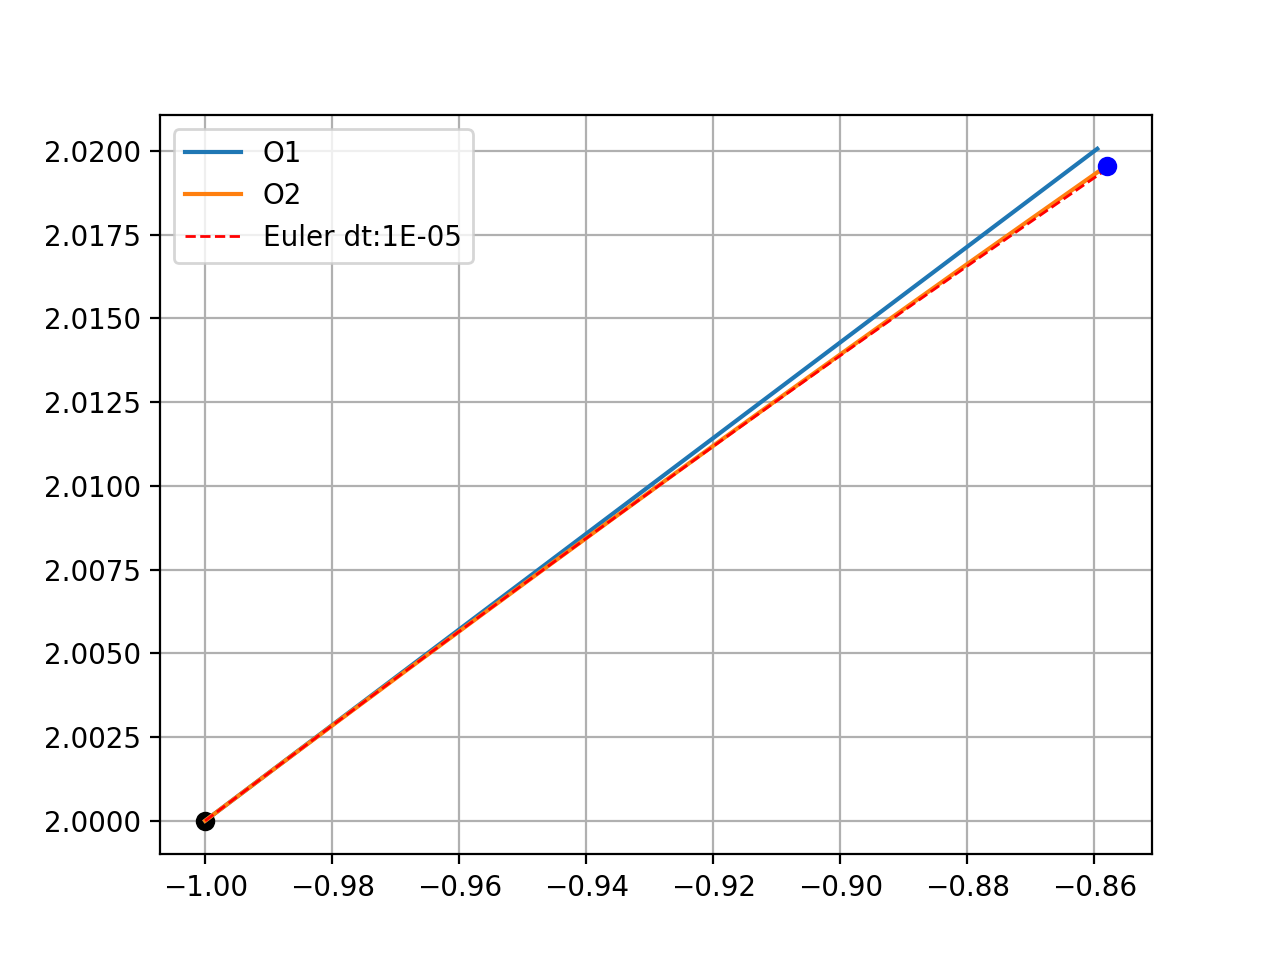

In [56]:
plt.figure()

plt.plot(x0[0],x0[1],'ko')
# plt.plot(x_vals_euler[:,0],x_vals_euler[:,1],'--r',linewidth=2.5, label="Euler dt:%.0E"%dt)

for i in range(1,order+1):
    label = "O%d"%(i)
#     print(label)
    plt.plot(x_vals_oti[i-1][:,0],x_vals_oti[i-1][:,1],'C%d'%(int(i-1)),label=label)
# end for

plt.plot(x_vals_euler[:,0],x_vals_euler[:,1],'--r',linewidth=1.0, label="Euler dt:%.0E"%dt)

plt.plot(xf[0],xf[1],'bo')
plt.legend()
plt.grid('on')
plt.show()

<IPython.core.display.Javascript object>


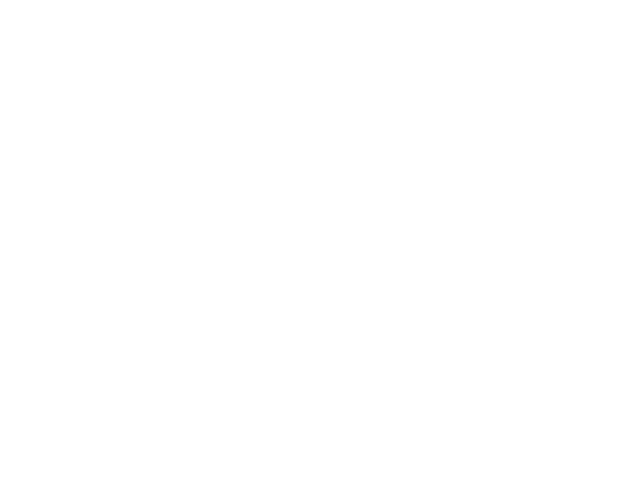

ValueError: operands could not be broadcast together with shapes (10661,) (10662,) 

In [11]:
plt.figure()

error = np.sqrt((x_vals_euler[:,0] - x_vals_oti[:,0])**2 + (x_vals_euler[:,1]-x_vals_oti[:,1])**2)
plt.plot(error,'r',linewidth=2.5)

plt.show()

In [40]:
# Analytical derivatives:

import sympy as sym

xs,ys = sym.symbols('x,y')

In [41]:
f1s,f2s = F_eval([xs,ys])

In [42]:
f1s

-(x**2 - y**2)/(x**2 + y**2)**2 + 1

In [43]:
f2s

-2*x*y/(x**2 + y**2)**2

In [37]:
i=2
"O{0}".format(i)

'O2'